In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import sklearn as skl
from google.colab import files

In [3]:
!pip install ydata-profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 72.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 42.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 80.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=7484d9deb74221a38b043f5116f3443504fc268e7b2ca2bd5882de155f63f6f1
  Stored in directory: /root/.cache/pip/wheels/1d/05/04/c6d7d3

In [4]:
my_data=pd.read_excel('/content/ISIS_SEMANA7_RESONANCIA - BU.XLSX.xlsx')

In [5]:
my_data.shape
my_data.dtypes

Fecha                                  datetime64[ns]
Hora                                           object
Episodio                                      float64
Clase Episodio                                float64
Paciente                                        int64
Apellido1                                      object
Apellido2                                      object
Nombre1                                        object
Nombre2                                        object
ID citación                                     int64
Num Dcto                                       object
Fecha naci.                            datetime64[ns]
Causal modificación                           float64
Texto: causal modificación                     object
Motivo de modificación                         object
Uo Plan                                        object
Aseguradora                                   float64
Nom Aseg.                                      object
Indicador Anulación         

In [6]:
#my_data.isnull().sum()

In [7]:
#my_data.describe()
target1=my_data['Indicador']
target1=np.squeeze(target1)
display(target1.isnull().sum())
display(target1.notnull().sum())

24505

4664

In [8]:
# Calcular la edad a partir de la fecha de nacimiento hasta la "fecha" de target
import matplotlib.pyplot as plt
import datetime 
my_data['Edad'] = (my_data['Fecha'] - my_data['Fecha naci.']) // datetime.timedelta(days=365.25)

my_data = my_data.drop(my_data.columns[[5,6,7,8,9,15,16,19,23,25,26,27,28,]], axis=1)
my_data = my_data.drop(my_data.columns[[5,6]], axis=1)
data=my_data.dtypes

# Mostrar las primeras filas del DataFrame actualizado
my_data.head() #pequeña muestra, muestra la fila que se especifique. 

,Fecha,Hora,Episodio,Clase Episodio,Paciente,Causal modificación,Texto: causal modificación,Motivo de modificación,Nom Aseg.,Indicador Anulación,...,Fecha crea.,Fecha mod.,Sala cita,Tp. plan,Comentario,Indicador,Status cita,Num Cita,Tipo de Cita,Edad
0,2018-01-02,08:30:00,4983961.0,2.0,992232,33.0,R-RP Mot Pers,NaN,NUEVAEPSS.A.RC,NaN,...,2017-11-01,2018-01-02,SL-RNM2,PYMP 35,RMN DE CEREBRO SIMPLE *ANESTESIAS*OK VALORACION,NaN,NaN,1,ATENDIDA,2
1,2018-01-02,16:05:00,5013641.0,2.0,466606,NaN,NaN,NaN,COOMEVAMEDICINAPREPAGAS.A.,NaN,...,2018-01-02,2018-01-02,SL-RNM3,PYMP 35,RMN DE TOBILLO DERE SIMPLE,NaN,NaN,1,ATENDIDA,54
2,2018-01-02,17:15:00,5013459.0,2.0,611678,NaN,NaN,CONFIR MADRE*NO CLAUSTROFOBICO NO IMP METALICOS,MPSURAMERICANAS.A.,NaN,...,2017-12-18,2018-01-02,SL-RNM3,PYMP 35,RNM CL CERVICAL SIMPLE,NaN,NaN,1,ATENDIDA,17
3,2018-01-02,11:25:00,5012160.0,2.0,1034601,NaN,NaN,NO MARCAPASOS NO CONTRAINDICACIONES.,ADMINIS.DELOSRECURSOSDELSISTEM,NaN,...,2018-01-02,2018-01-02,SL-RNM1,PYMP 35,RNM HOMBRO DER SIMPLE,NaN,NaN,1,ATENDIDA,55
4,2018-01-02,10:50:00,5012647.0,2.0,1038516,NaN,NaN,"NO AMBULANCIA, NO HOSPITA, NO OXIGENO, NO LATEX",SURAMERICANAS.A.SEGUROSRIESGOS,NaN,...,2017-12-29,2018-01-02,SL-RNM1,PYMP 35,RMN CL LUMBOSACRA SIMPLE PG MARCELA PEREZ ARL ...,NaN,NaN,1,ATENDIDA,29


In [9]:
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<ipython-input-10-b0e6cb24c119>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Rango de edad'] = pd.cut(my_data['Edad'], bins=bins, labels=labels)


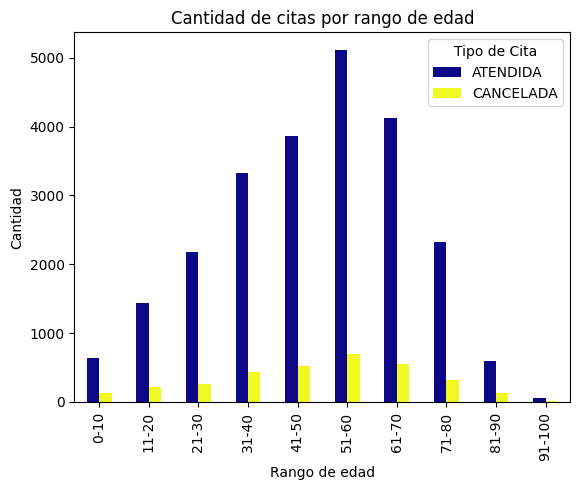

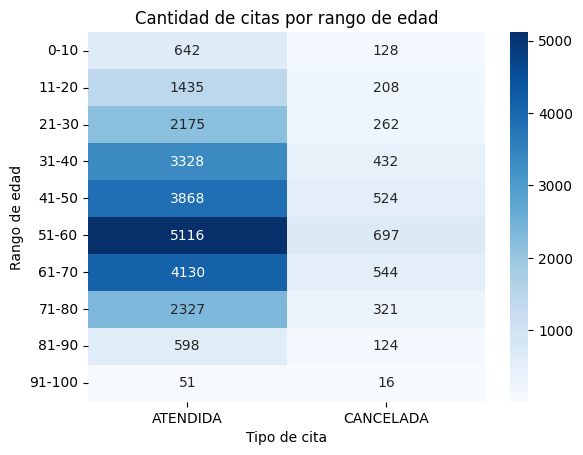

In [10]:
import seaborn as sns
my_data = my_data[my_data['Tipo de Cita'] != 'ASIGNADA']

# Crear una nueva columna con los rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
my_data['Rango de edad'] = pd.cut(my_data['Edad'], bins=bins, labels=labels)

# Crear la tabla de contingencia con los rangos de edad y el tipo de cita
tabla_edad_cita = pd.crosstab(my_data['Rango de edad'], my_data['Tipo de Cita'])
tabla_edad_cita.plot(kind='bar', cmap= 'plasma')

# Ajustar el título y los ejes de la gráfica
plt.title('Cantidad de citas por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()

# Graficar la tabla con un heatmap
sns.heatmap(tabla_edad_cita, cmap='Blues', annot=True, fmt='g')
# Ajustar el título y los ejes del plot
plt.title('Cantidad de citas por rango de edad')
plt.xlabel('Tipo de cita')
plt.ylabel('Rango de edad')

# Mostrar el plot
plt.show()

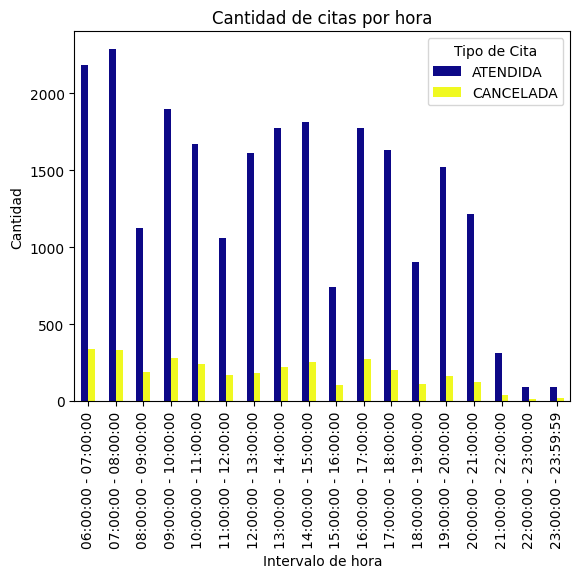

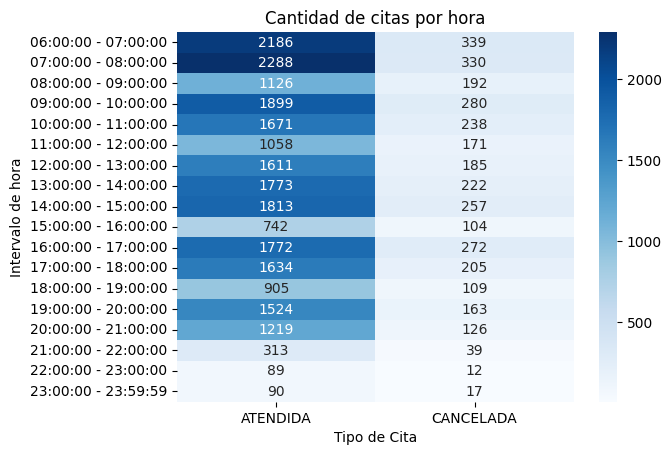

In [11]:
import datetime

# Definir la hora de inicio y fin
hora_inicio = datetime.time(6, 0, 0)
hora_fin = datetime.time(23, 59, 59)

# Crear una lista con los intervalos de una hora
intervalos = [datetime.time(hour=i) for i in range(hora_inicio.hour, hora_fin.hour+1)]

# Crear una función que asigna un intervalo de hora a cada hora
def asignar_intervalo(hora):
    for i in range(len(intervalos)-1):
        if intervalos[i] <= hora < intervalos[i+1]:
            return f'{intervalos[i]} - {intervalos[i+1]}'

    return f'{intervalos[-1]} - {hora_fin}'

# Crear la columna de intervalos de hora en el DataFrame
my_data['Intervalo de hora'] = my_data['Hora'].apply(asignar_intervalo)


tabla_hora_cita = pd.crosstab(my_data['Intervalo de hora'], my_data['Tipo de Cita'])
tabla_hora_cita.plot(kind='bar', cmap= 'plasma')
plt.title('Cantidad de citas por hora')
plt.xlabel('Intervalo de hora')
plt.ylabel('Cantidad')

# Mostrar el plot
plt.show()

sns.heatmap(tabla_hora_cita, cmap='Blues', annot=True, fmt='g')

# Ajustar el título y los ejes del plot
plt.title('Cantidad de citas por hora')
plt.xlabel('Tipo de Cita')
plt.ylabel('Intervalo de hora')

# Mostrar el plot
plt.show()




Tipo de Cita  ATENDIDA  CANCELADA
Fecha                            
1                  761         59
2                  772         53
3                  736         63
4                  725         77
5                  848        108
6                  686         75
7                  745         92
8                  896        121
9                  754        108
10                 973         87
11                 789         66
12                 820         85


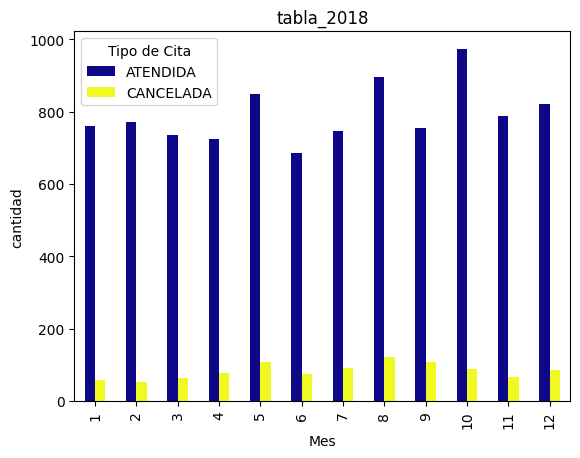

In [12]:
# Filtrar para obtener solo el año 2018
citas_2018 = my_data[my_data['Fecha'].dt.year == 2018]

# Obtener la cantidad de citas por mes y tipo de cita en el año 2019
citas_2018_mes_tipo = pd.crosstab(index=citas_2018['Fecha'].dt.month,
                                  columns=citas_2018['Tipo de Cita'])

citas_2018_mes_tipo.plot(kind='bar',cmap= 'plasma')

# Ajustar el título y los ejes de la gráfica
plt.title('tabla_2018')
plt.xlabel('Mes')
plt.ylabel('cantidad')


print(citas_2018_mes_tipo)
plt.show()



Tipo de Cita  ATENDIDA  CANCELADA
Fecha                            
1                  869         63
2                  947         75
3                  767        122
4                  894        109
5                  828        104
6                  805        126
7                  887        110
8                  901        146
9                  845        117
10                 861        143
11                 700        124
12                 700        124


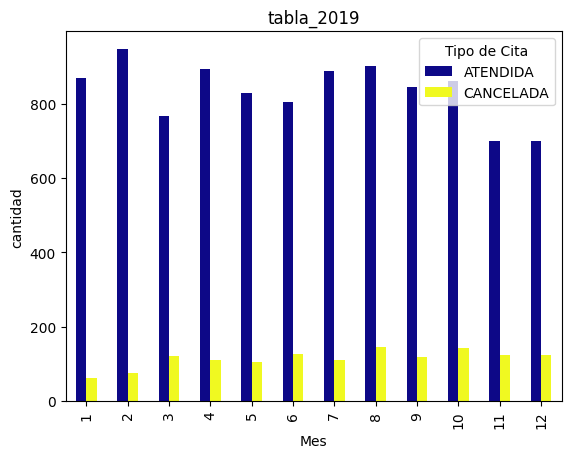

In [13]:
# Filtrar para obtener solo el año 2019
citas_2019 = my_data[my_data['Fecha'].dt.year == 2019]

# Obtener la cantidad de citas por mes y tipo de cita en el año 2019
citas_2019_mes_tipo = pd.crosstab(index=citas_2019['Fecha'].dt.month,
                                  columns=citas_2019['Tipo de Cita'])

citas_2019_mes_tipo.plot(kind='bar',cmap= 'plasma')

# Ajustar el título y los ejes de la gráfica
plt.title('tabla_2019')
plt.xlabel('Mes')
plt.ylabel('cantidad')


print(citas_2019_mes_tipo)
plt.show()

Tipo de Cita  ATENDIDA  CANCELADA
Fecha                            
1                  858        131
2                  809        198
3                  702        161
4                  246        114
5                  369         83
6                  559         99
7                  661        118


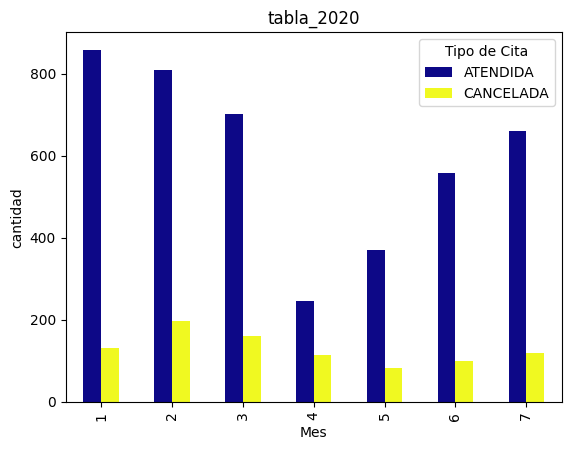

In [14]:
citas_2020 = my_data[my_data['Fecha'].dt.year == 2020]

# Obtener la cantidad de citas por mes y tipo de cita en el año 2019
citas_2020_mes_tipo = pd.crosstab(index=citas_2020['Fecha'].dt.month,
                                  columns=citas_2020['Tipo de Cita'])

citas_2020_mes_tipo.plot(kind='bar',cmap= 'plasma')

# Ajustar el título y los ejes de la gráfica
plt.title('tabla_2020')
plt.xlabel('Mes')
plt.ylabel('cantidad')


print(citas_2020_mes_tipo)
plt.show()

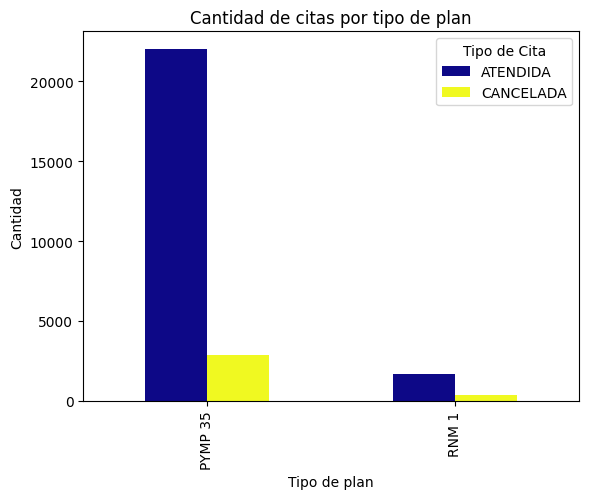

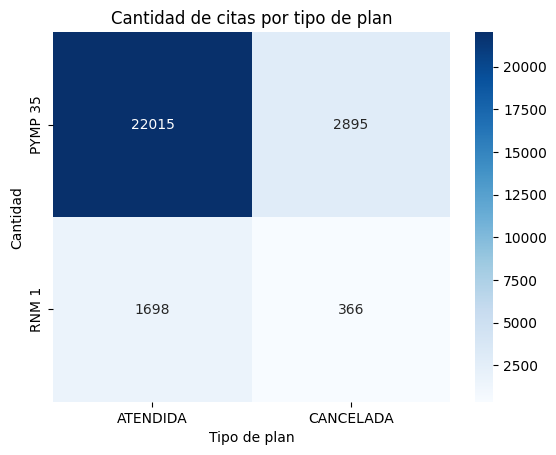

In [15]:
tabla_tpplan_cita = pd.crosstab(my_data['Tp. plan'], my_data['Tipo de Cita'])
tabla_tpplan_cita.plot(kind='bar', cmap= 'plasma')

# Ajustar el título y los ejes de la gráfica
plt.title('Cantidad de citas por tipo de plan')
plt.xlabel('Tipo de plan')
plt.ylabel('Cantidad')

# Mostrar la gráfica
plt.show()

# Graficar la tabla con un heatmap
sns.heatmap(tabla_tpplan_cita, cmap='Blues', annot=True, fmt='g')
# Ajustar el título y los ejes de la gráfica
plt.title('Cantidad de citas por tipo de plan')
plt.xlabel('Tipo de plan')
plt.ylabel('Cantidad')

# Mostrar el plot
plt.show()

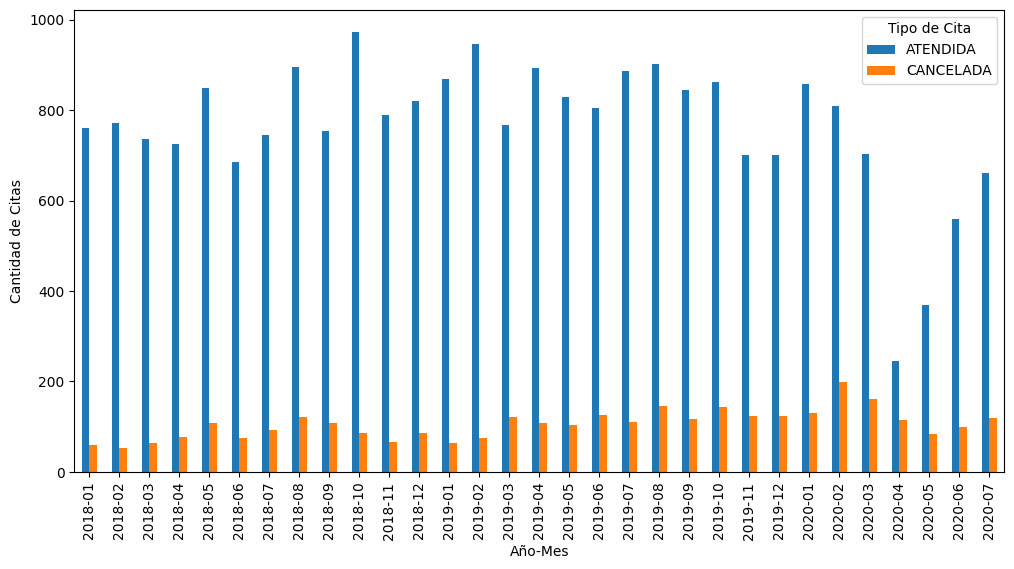

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar citas desde enero 2018 hasta julio 2020
my_data['Fecha'] = pd.to_datetime(my_data['Fecha'])
citas = my_data[(my_data['Fecha'] >= '2018-01-01') & (my_data['Fecha'] <= '2020-07-31')]

# Crear una nueva columna con el mes y el año de cada cita
citas['Mes'] = citas['Fecha'].dt.strftime('%Y-%m')

# Calcular la cantidad de citas atendidas y canceladas por mes
citas_mes_tipo = pd.crosstab(index=citas['Mes'], columns=citas['Tipo de Cita'])

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(12,6))
citas_mes_tipo.plot(kind='bar', ax=ax)
ax.set_xlabel('Año-Mes')
ax.set_ylabel('Cantidad de Citas')
ax.legend(title='Tipo de Cita')
plt.show()




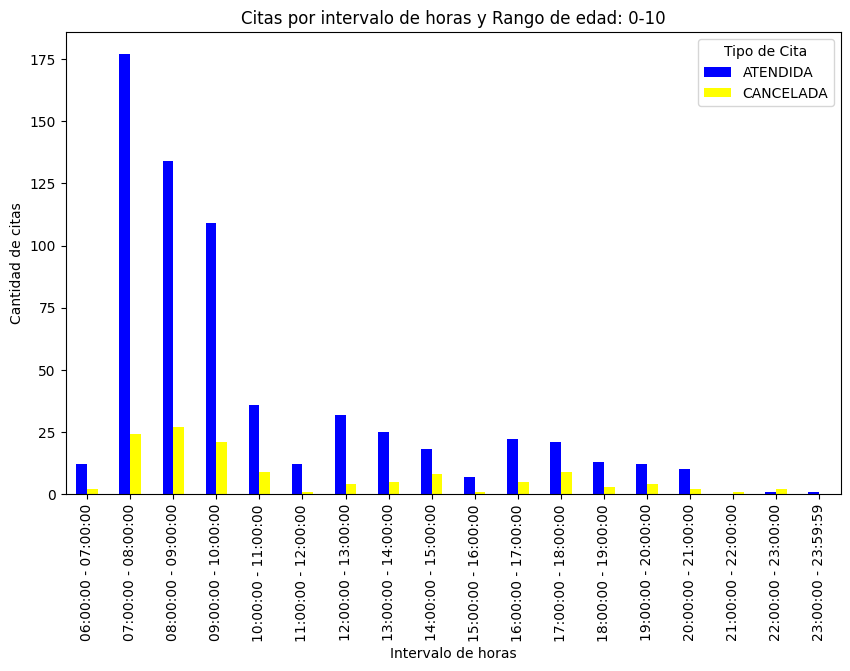

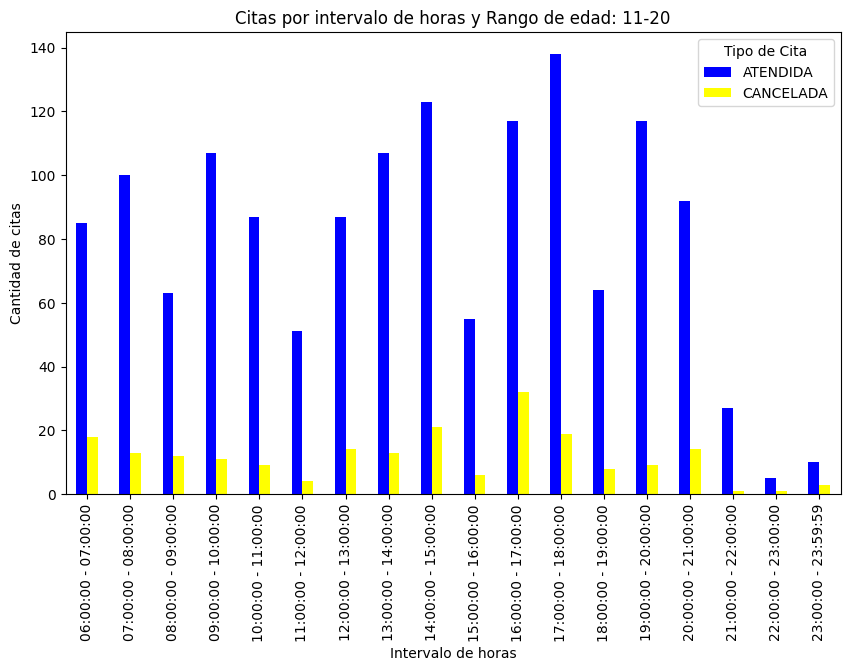

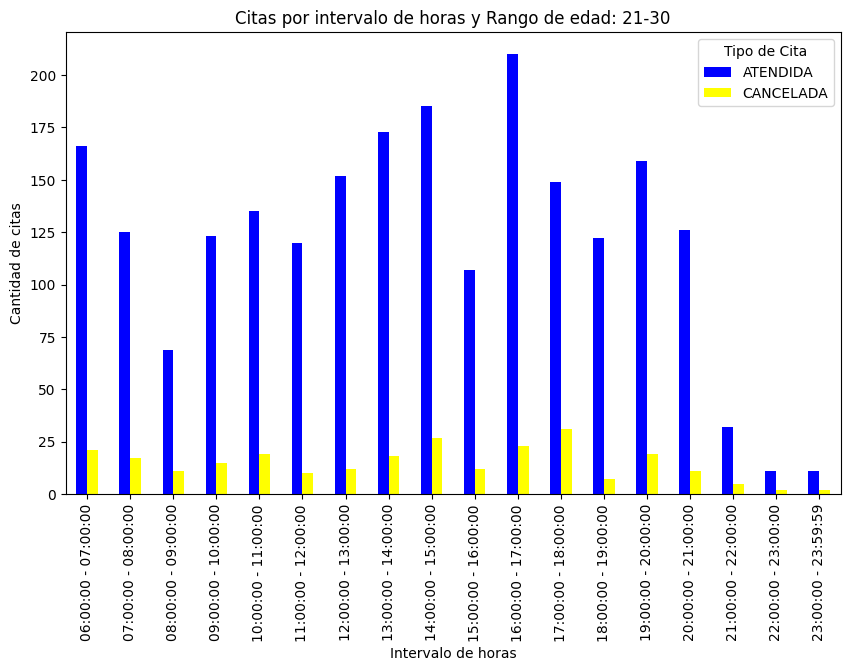

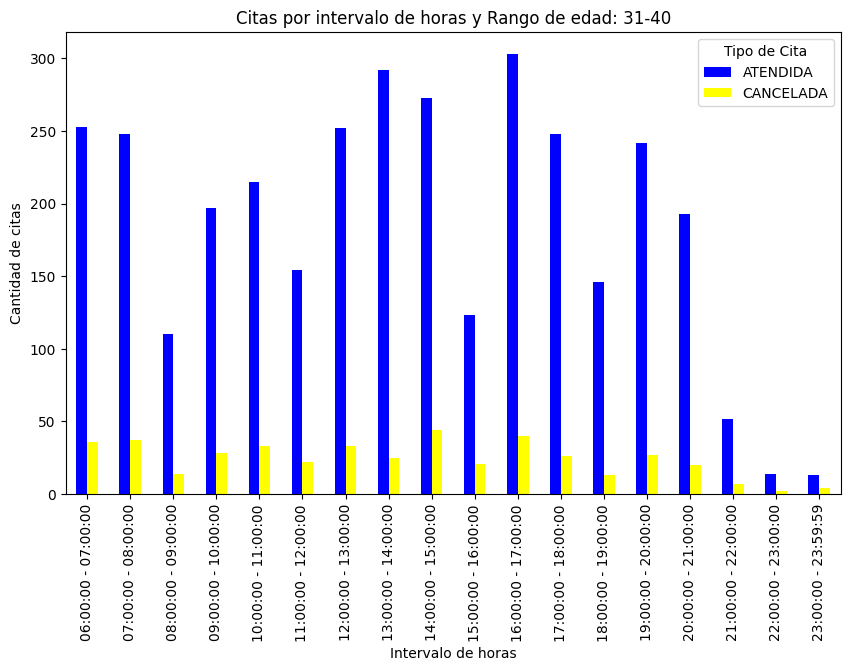

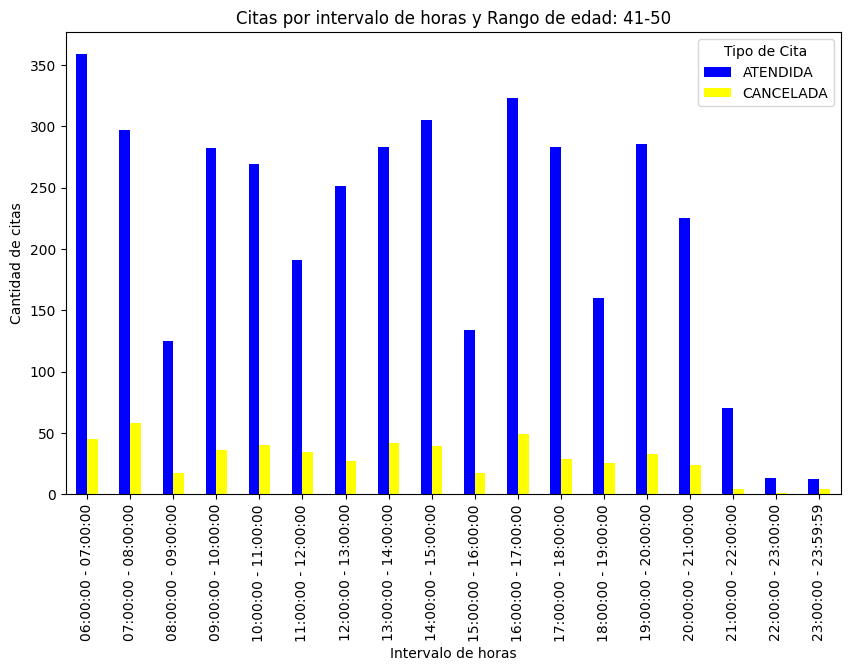

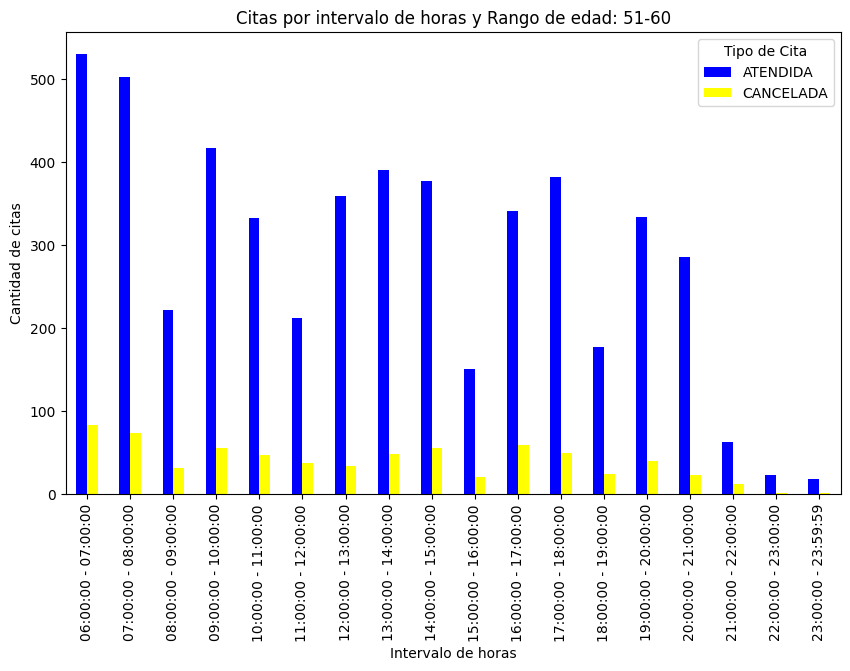

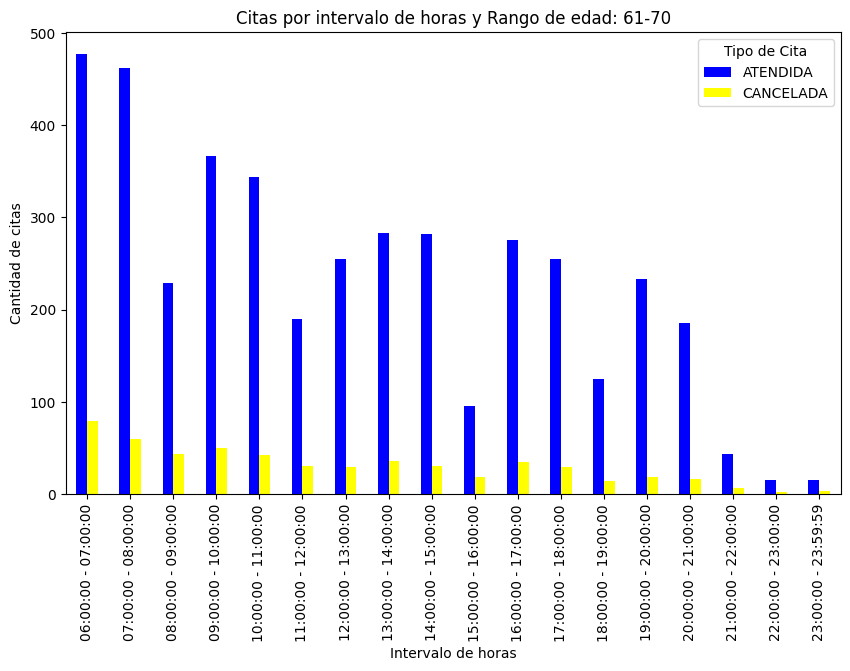

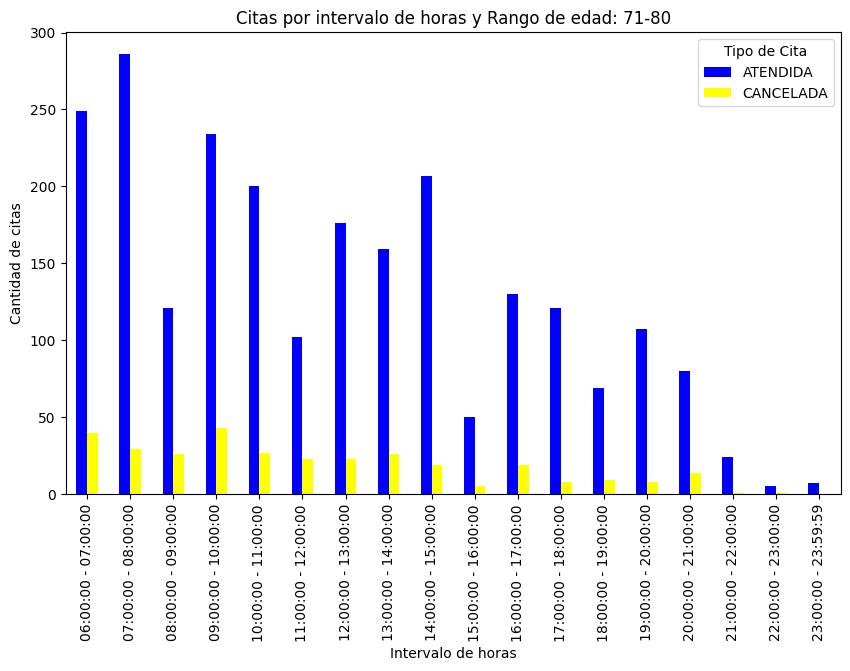

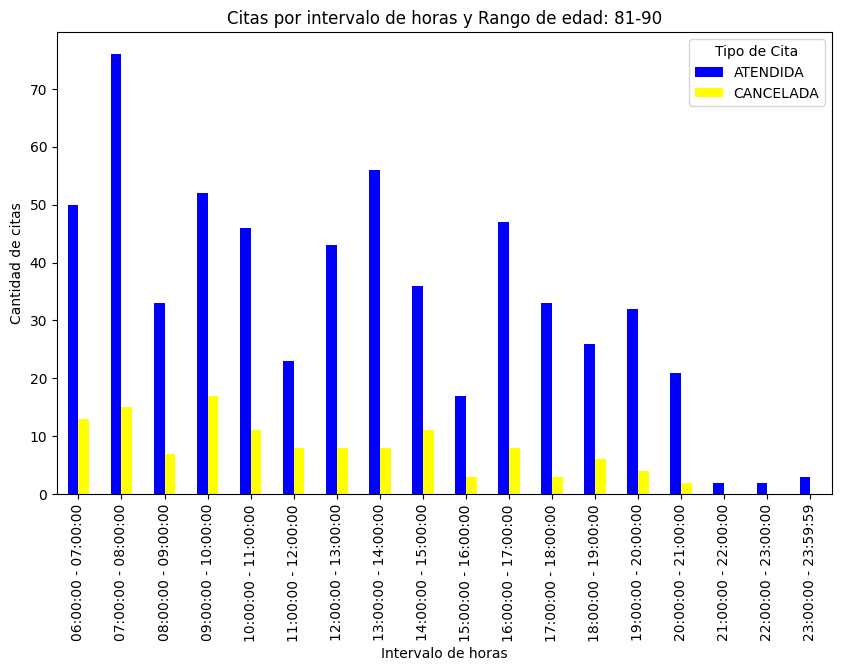

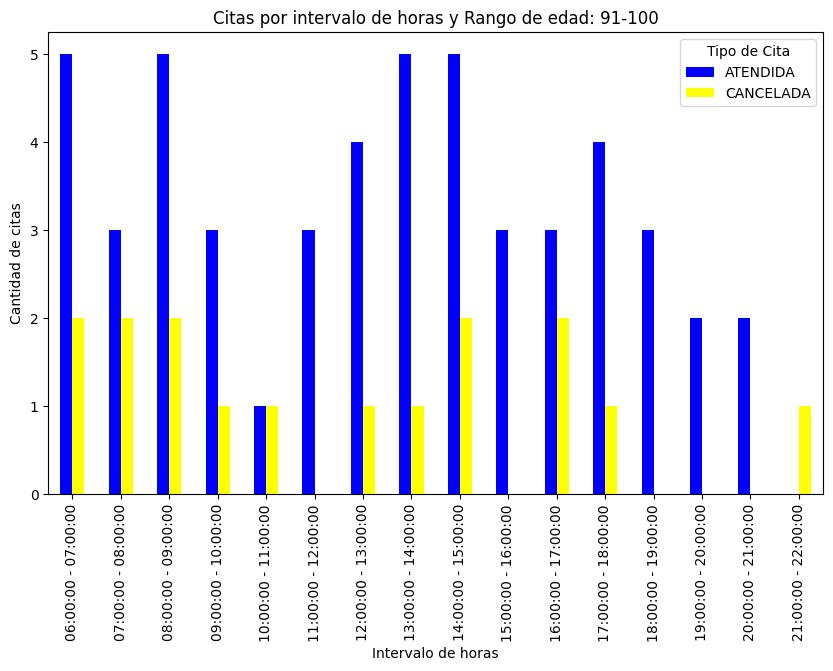

In [17]:
for rango in labels:
    citas_rango = my_data[my_data['Rango de edad'] == rango]
    citas_rango_hora_tipo = pd.crosstab(index=citas_rango['Intervalo de hora'], columns=citas_rango['Tipo de Cita'])
    citas_rango_hora_tipo.plot(kind='bar', figsize=(10,6), color=['blue', 'yellow'])
    plt.title(f"Citas por intervalo de horas y Rango de edad: {rango}")
    plt.xlabel("Intervalo de horas")
    plt.ylabel("Cantidad de citas")
    plt.show()


In [18]:
citas_por_aseguradora = my_data['Nom Aseg.'].value_counts()

total_citas = my_data.shape[0]
citas_por_aseguradora = my_data['Nom Aseg.'].value_counts()

for aseguradora, citas in citas_por_aseguradora.items():
    porcentaje_citas = (citas / total_citas) * 100
    print(f"{aseguradora}: {citas} citas ({porcentaje_citas:.2f}% del total)")



COOMEVAMEDICINAPREPAGAS.A.: 5850 citas (21.69% del total)
SERVICIOOCCID.DESALUD: 4248 citas (15.75% del total)
SEGUROSDEVIDASURAMERICANAS.A.: 3594 citas (13.32% del total)
COLSANITASMPS.A.: 1765 citas (6.54% del total)
COLMENAS.A.COMPAÑÍADESEGUROSVI: 952 citas (3.53% del total)
COLMEDICAMEDICINAPREPAGADA: 945 citas (3.50% del total)
PARTICULARPLENO: 910 citas (3.37% del total)
MPSURAMERICANAS.A.: 908 citas (3.37% del total)
COMFENALCOEPSPGPONCOLOGIA: 614 citas (2.28% del total)
NUEVAEPSONCOLOGIARC: 543 citas (2.01% del total)
COMPAÑIASEGUROSBOLIVARS.A.: 542 citas (2.01% del total)
ALLIANZSEGUROSDEVIDAS.A.: 523 citas (1.94% del total)
NUEVAEPSS.A.RC: 491 citas (1.82% del total)
SERVICIOOCCID.DESALUDRC: 491 citas (1.82% del total)
EPSSURAPGPONCOLOGIA: 444 citas (1.65% del total)
SURAMERICANAS.A.SEGUROSRIESGOS: 258 citas (0.96% del total)
MEDPLUSMEDICINAPREPAGADAS.A: 221 citas (0.82% del total)
EPSSURAEVENTORC: 215 citas (0.80% del total)
FUNDACIONVALLEDELLILI: 152 citas (0.56% del total)

In [19]:
from imblearn.over_sampling import SMOTE
X = my_data[['Tp. plan', 'Edad', 'Fecha', 'Hora']]

X['Tp. plan'] = X['Tp. plan'].map({'PYMP 35': 0, 'RNM 1': 1})

X['Fecha'] = pd.to_datetime(X['Fecha']).astype(int) // 10**9

# Convertir la columna "Hora" a valores numéricos
X['hora_str'] = X['Hora'].apply(lambda x: x.strftime('%H:%M:%S'))
X['hora_datetime'] = pd.to_datetime(X['hora_str'], format='%H:%M:%S')
X['Hora'] = X['hora_datetime'].dt.hour
X.drop(['hora_str', 'hora_datetime'], axis=1, inplace=True)

y = my_data['Tipo de Cita']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
y_res.value_counts()

<ipython-input-19-08205227f5b5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Tp. plan'] = X['Tp. plan'].map({'PYMP 35': 0, 'RNM 1': 1})
<ipython-input-19-08205227f5b5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fecha'] = pd.to_datetime(X['Fecha']).astype(int) // 10**9
<ipython-input-19-08205227f5b5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

ATENDIDA     23713
CANCELADA    23713
Name: Tipo de Cita, dtype: int64

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import pandas as pd

# Separar las variables de entrada (X) de la variable de salida (y)
X = my_data[['Tp. plan', 'Edad', 'Fecha', 'Hora']]
X['Tp. plan'] = X['Tp. plan'].map({'PYMP 35': 0, 'RNM 1': 1})
X['Fecha'] = pd.to_datetime(X['Fecha']).astype(int) // 10**9
X['hora_str'] = X['Hora'].apply(lambda x: x.strftime('%H:%M:%S'))
X['hora_datetime'] = pd.to_datetime(X['hora_str'], format='%H:%M:%S')
X['Hora'] = X['hora_datetime'].dt.hour
X.drop(['hora_str', 'hora_datetime'], axis=1, inplace=True)
y = my_data['Tipo de Cita']

# Balancear los datos usando SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Crear un modelo de Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(x_train, y_train)

# Predecir los valores de la variable de salida usando los datos de prueba
y_pred = rf.predict(x_test)

# Evaluar el modelo usando diversas métricas
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='ATENDIDA')
recall = recall_score(y_test, y_pred, pos_label='ATENDIDA')
f1 = f1_score(y_test, y_pred, pos_label='ATENDIDA')

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


<ipython-input-20-5e594e24b45f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Tp. plan'] = X['Tp. plan'].map({'PYMP 35': 0, 'RNM 1': 1})
<ipython-input-20-5e594e24b45f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Fecha'] = pd.to_datetime(X['Fecha']).astype(int) // 10**9
<ipython-input-20-5e594e24b45f>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

Accuracy: 0.7160025300442757
Precision: 0.7295081967213115
Recall: 0.6802547770700637
F1 score: 0.7040210942649967


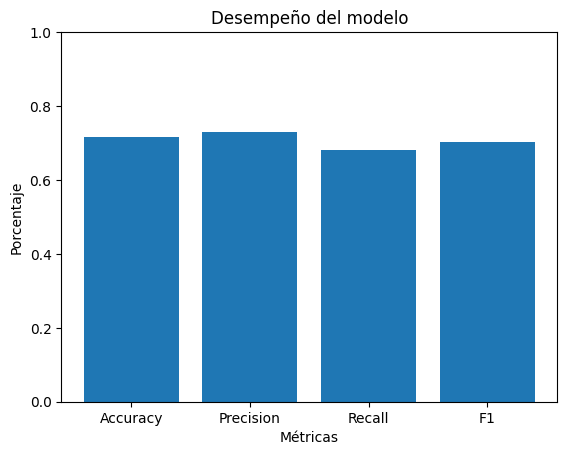

In [21]:
import matplotlib.pyplot as plt

# Crear una lista con los nombres de las métricas y otra con sus valores
metric_names = ['Accuracy', 'Precision', 'Recall', 'F1']
metric_values = [accuracy, precision, recall, f1]

# Crear el gráfico de barras
plt.bar(metric_names, metric_values)
plt.title('Desempeño del modelo')
plt.xlabel('Métricas')
plt.ylabel('Porcentaje')
plt.ylim([0, 1])

# Mostrar el gráfico
plt.show()


In [22]:
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred, pos_label='ATENDIDA') * 100
recall = recall_score(y_test, y_pred, pos_label='ATENDIDA') * 100
f1 = f1_score(y_test, y_pred, pos_label='ATENDIDA') * 100
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1-score: {f1:.2f}%")


Accuracy: 71.60%
Precision: 72.95%
Recall: 68.03%
F1-score: 70.40%


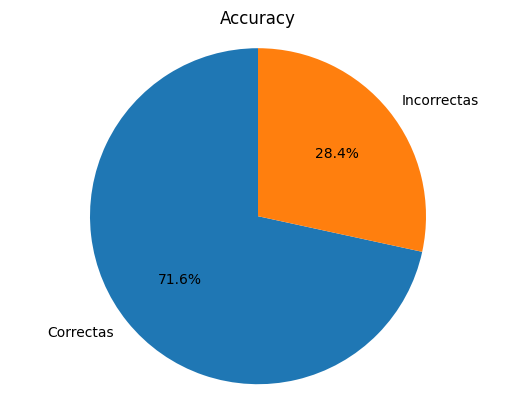

In [23]:
import matplotlib.pyplot as plt

accuracy = accuracy_score(y_test, y_pred) * 100

labels = ['Correctas', 'Incorrectas']
sizes = [accuracy, 100 - accuracy]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')

plt.title('Accuracy')
plt.show()


In [24]:
from sklearn.metrics import confusion_matrix

# Obtener la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:")
print(cm)


Matriz de confusión:
[[3204 1506]
 [1188 3588]]


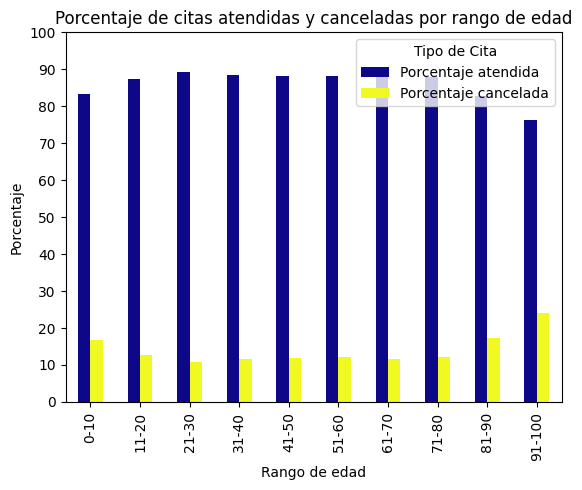

In [25]:
import seaborn as sns
my_data = my_data[my_data['Tipo de Cita'] != 'ASIGNADA']

# Crear una nueva columna con los rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
my_data['Rango de edad'] = pd.cut(my_data['Edad'], bins=bins, labels=labels)

# Crear la tabla de contingencia con los rangos de edad y el tipo de cita
tabla_edad_cita = pd.crosstab(my_data['Rango de edad'], my_data['Tipo de Cita'])

# Calcular los porcentajes de citas atendidas y canceladas por rango de edad
tabla_edad_cita['Porcentaje atendida'] = tabla_edad_cita['ATENDIDA'] / (tabla_edad_cita['ATENDIDA'] + tabla_edad_cita['CANCELADA']) * 100
tabla_edad_cita['Porcentaje cancelada'] = tabla_edad_cita['CANCELADA'] / (tabla_edad_cita['ATENDIDA'] + tabla_edad_cita['CANCELADA']) * 100

# Graficar los porcentajes en un gráfico de barras apiladas
tabla_edad_cita[['Porcentaje atendida', 'Porcentaje cancelada']].plot(kind='bar', cmap='plasma')

# Ajustar el título y los ejes de la gráfica
plt.title('Porcentaje de citas atendidas y canceladas por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Porcentaje')

# Mostrar la gráfica
plt.yticks(np.arange(0, 101, 10))
plt.show()


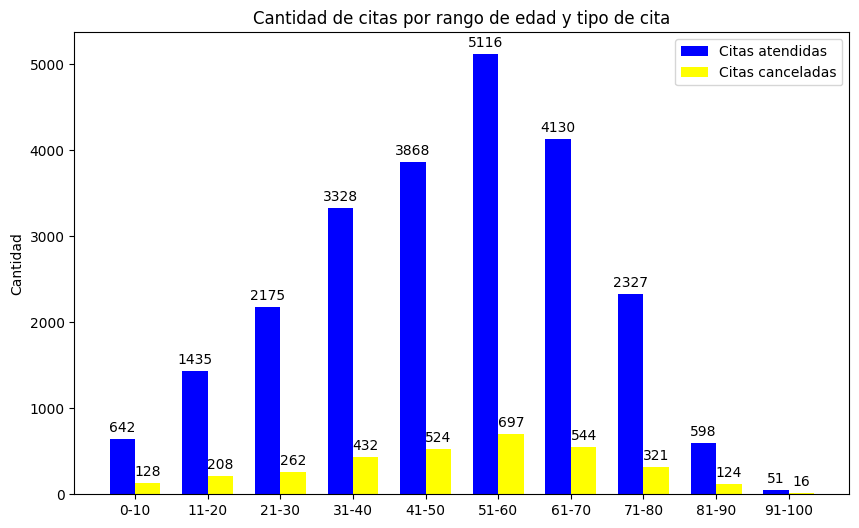

In [26]:
import seaborn as sns
my_data = my_data[my_data['Tipo de Cita'] != 'ASIGNADA']

# Crear una nueva columna con los rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
my_data['Rango de edad'] = pd.cut(my_data['Edad'], bins=bins, labels=labels)

# Crear la tabla de contingencia con los rangos de edad y el tipo de cita
tabla_edad_cita = pd.crosstab(my_data['Rango de edad'], my_data['Tipo de Cita'])

# Calcular el porcentaje de citas atendidas y canceladas por rango de edad
porcentaje_edad_cita = tabla_edad_cita.div(tabla_edad_cita.sum(axis=1), axis=0) * 100

# Crear la figura y los ejes para el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Crear los datos para las barras de citas atendidas
x = np.arange(len(labels))
width = 0.35

citas_atendidas = tabla_edad_cita['ATENDIDA']
rects1 = ax.bar(x - width/2, citas_atendidas, width, label='Citas atendidas', color='blue')

# Crear los datos para las barras de citas canceladas
citas_canceladas = tabla_edad_cita['CANCELADA']
rects2 = ax.bar(x + width/2, citas_canceladas, width, label='Citas canceladas', color='yellow')

# Añadir los valores de las barras
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Ajustar los ejes del gráfico de barras
ax.set_title('Cantidad de citas por rango de edad y tipo de cita')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Cantidad')
ax.legend()

plt.show()



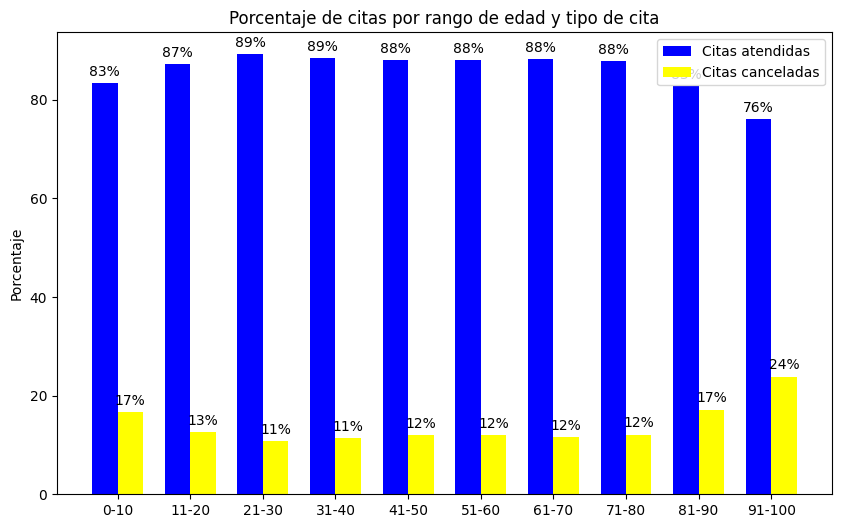

In [27]:
import seaborn as sns
my_data = my_data[my_data['Tipo de Cita'] != 'ASIGNADA']

# Crear una nueva columna con los rangos de edad
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100']
my_data['Rango de edad'] = pd.cut(my_data['Edad'], bins=bins, labels=labels)

# Crear la tabla de contingencia con los rangos de edad y el tipo de cita
tabla_edad_cita = pd.crosstab(my_data['Rango de edad'], my_data['Tipo de Cita'])

# Calcular el porcentaje de citas atendidas y canceladas por rango de edad
porcentaje_edad_cita = tabla_edad_cita.div(tabla_edad_cita.sum(axis=1), axis=0) * 100

# Crear la figura y los ejes para el gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Crear los datos para las barras de citas atendidas
x = np.arange(len(labels))
width = 0.35

citas_atendidas = porcentaje_edad_cita['ATENDIDA']
rects1 = ax.bar(x - width/2, citas_atendidas, width, label='Citas atendidas', color='blue')

# Crear los datos para las barras de citas canceladas
citas_canceladas = porcentaje_edad_cita['CANCELADA']
rects2 = ax.bar(x + width/2, citas_canceladas, width, label='Citas canceladas', color='yellow')

# Añadir los valores de las barras
for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}%',
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')

# Ajustar los ejes del gráfico de barras
ax.set_title('Porcentaje de citas por rango de edad y tipo de cita')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Porcentaje')
ax.legend()

plt.show()


In [28]:
import pandas as pd

# Convierte la columna "Fecha" al formato de fecha de pandas
my_data['Fecha'] = pd.to_datetime(my_data['Fecha'], format='%d/%m/%y')

# Cambia el formato de fecha a una representación numérica
my_data['Fecha'] = my_data['Fecha'].astype(str).str.replace('-', '').astype(int)

# Imprime el DataFrame resultante
print(my_data)


          Fecha      Hora   Episodio  Clase Episodio  Paciente  \
0      20180102  08:30:00  4983961.0             2.0    992232   
1      20180102  16:05:00  5013641.0             2.0    466606   
2      20180102  17:15:00  5013459.0             2.0    611678   
3      20180102  11:25:00  5012160.0             2.0   1034601   
4      20180102  10:50:00  5012647.0             2.0   1038516   
...         ...       ...        ...             ...       ...   
29164  20200731  17:00:00  7356601.0             2.0    803986   
29165  20200731  17:45:00  7356617.0             2.0   1314154   
29166  20200731  17:30:00  7356627.0             2.0    267935   
29167  20200731  18:10:00  7357029.0             2.0    314792   
29168  20200731  19:30:00  7357037.0             2.0    465954   

       Causal modificación Texto: causal modificación  \
0                     33.0              R-RP Mot Pers   
1                      NaN                        NaN   
2                      NaN          

In [ ]:
import datetime

# Definir la hora de inicio y fin
hora_inicio = datetime.time(6, 0, 0)
hora_fin = datetime.time(23, 59, 59)

# Crear una lista con los intervalos de una hora
intervalos = [datetime.time(hour=i) for i in range(hora_inicio.hour, hora_fin.hour+1)]

# Crear una función que asigna un intervalo de hora a cada hora
def asignar_intervalo(hora):
    for i in range(len(intervalos)-1):
        if intervalos[i] <= hora < intervalos[i+1]:
            return f'{intervalos[i]} - {intervalos[i+1]}'

    return f'{intervalos[-1]} - {hora_fin}'

# Crear la columna de intervalos de hora en el DataFrame
my_data['Intervalo de hora'] = my_data['Hora'].apply(asignar_intervalo)


tabla_hora_cita = pd.crosstab(my_data['Intervalo de hora'], my_data['Tipo de Cita'])
tabla_hora_cita.plot(kind='bar', cmap= 'plasma')
plt.title('Cantidad de citas por hora')
plt.xlabel('Intervalo de hora')
plt.ylabel('Cantidad')

# Mostrar el plot
plt.show()

sns.heatmap(tabla_hora_cita, cmap='Blues', annot=True, fmt='g')

# Ajustar el título y los ejes del plot
plt.title('Cantidad de citas por hora')
plt.xlabel('Tipo de Cita')
plt.ylabel('Intervalo de hora')

# Mostrar el plot
plt.show()